    Distance (cm)  Battery (volts)  Step limit (15-(30-stride)cm)  \
0             8.5             11.0                          15.00   
1            15.5             11.0                          15.00   
2            21.5             11.0                          15.00   
3            29.0             10.9                          15.00   
4            32.6             10.9                          15.00   
..            ...              ...                            ...   
87           69.0             12.0                          18.00   
88           78.0             12.0                          17.80   
89           62.0             11.9                          18.30   
90           59.0             11.9                          18.35   
91           36.0             11.8                          20.30   

    Stride (1 - 30-steplimit) cm  Stride Count (1 - )  
0                           2.00                 3.00  
1                           2.00                 5.00  
2  

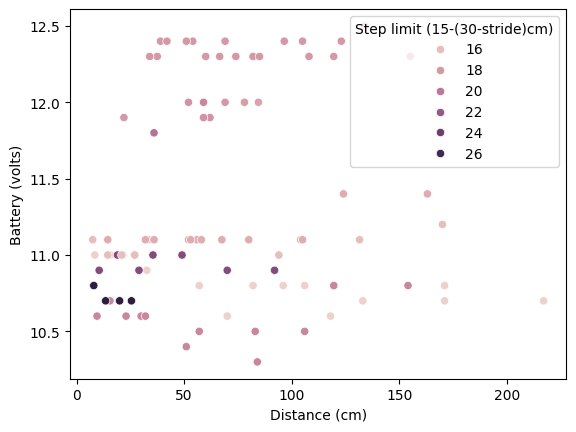

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns


data = pd.read_csv("/Users/sebastienjames/Documents/CS301/Lab3/data.csv")
data.dropna(inplace=True)

sns.scatterplot(data=data, x="Distance (cm)", y="Battery (volts)", hue="Step limit (15-(30-stride)cm)")
print(data)

     Distance (cm)  Battery (volts)  Step limit (15-(30-stride)cm)  \
98            24.0             11.4                       1.568079   
108           24.0             11.3                       1.460210   
89            23.0             11.5                       0.769443   
43            27.0             11.0                       0.581055   
30            27.0             11.0                       0.835267   
39            25.5             10.7                       0.894208   
105           28.0             11.3                       0.518300   
87            28.0             11.6                       0.505758   
64            22.0             11.9                       0.463529   
18            23.0             10.6                       0.471689   
2             21.5             11.0                       0.360856   
86            21.0             11.6                       0.384722   
42            21.0             11.0                       0.343579   
32            29.0  

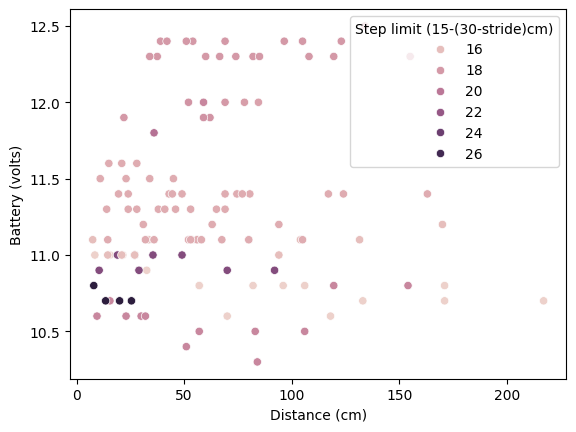

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


data = pd.read_csv("/Users/sebastienjames/Documents/CS301/Lab3/data.csv")
data.dropna(inplace=True)

data["dist_per_step"] = data["Distance (cm)"] / data["Stride Count (1 - )"]
# print(data)

sns.scatterplot(data=data, x="Distance (cm)", y="Battery (volts)", hue="Step limit (15-(30-stride)cm)")
# print(data)
def get_distance(goal, volt):
    newdata = data[["Distance (cm)", "Battery (volts)"]][:]
    sum_values = newdata.sum(axis=0)
    newdata = newdata / sum_values

    newdata["Distance (cm)"] -= goal / sum_values["Distance (cm)"]
    newdata["Distance (cm)"] *= newdata["Distance (cm)"]
    newdata["Battery (volts)"] -= volt / sum_values["Battery (volts)"]
    newdata["Battery (volts)"] *= newdata["Battery (volts)"]

    newdata["sum"] = 2*newdata["Distance (cm)"] + newdata["Battery (volts)"]
    newdata["sum"] = np.sqrt(newdata["sum"])

    return newdata

goal = 50
volt = 11.4

data["weight"] = 1 / get_distance(goal, volt)["sum"]
data["weight"]= data["weight"] / data["weight"].sum()

data = data.sort_values("weight", ascending=False)

n = 15

data["Step limit (15-(30-stride)cm)"] *= data["weight"]
data["Stride (1 - 30-steplimit) cm"] *= data["weight"]
data["Stride Count (1 - )"] *= data["weight"]

data = data.head(n)
print(data)

weight = data["weight"].sum()
print("Step Limit:", data["Step limit (15-(30-stride)cm)"].sum() / weight)
print("Stride:", data["Stride (1 - 30-steplimit) cm"].sum() / weight)
print("Stride Count:", data["Stride Count (1 - )"].sum() / weight)


